In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [5]:
training_set = dataset_train.iloc[:, 1:2].values

In [6]:
print(training_set)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


In [8]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scale = sc.fit_transform(training_set)

In [11]:
x_train = []
y_train = []
for i in range(60, 1258):
    x_train.append(training_set_scale[i-60:i, 0])
    y_train.append(training_set_scale[i, 0])
x_train, y_train = np.array(x_train),np.array(y_train)

In [13]:
print(x_train)

[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]


In [14]:
print(y_train)

[0.08627874 0.08471612 0.07454052 ... 0.95725128 0.93796041 0.93688146]


In [15]:
x_train = np.reshape(x_train, [x_train.shape[0], x_train.shape[1], 1])

In [18]:
x_train.shape

(1198, 60, 1)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [22]:
regressor = Sequential()

In [23]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [24]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=False))
regressor.add(Dropout(0.2))

In [26]:
regressor.add(Dense(units=1))

In [27]:
regressor.compile(optimizer= 'adam', loss = 'mean_squared_error')

In [28]:
regressor.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 6s 170ms/step - loss: 0.0389
Epoch 2/100
38/38 [==============================] - 6s 163ms/step - loss: 0.0077
Epoch 3/100
38/38 [==============================] - 6s 161ms/step - loss: 0.0060
Epoch 4/100
38/38 [==============================] - 6s 152ms/step - loss: 0.0056
Epoch 5/100
38/38 [==============================] - 6s 154ms/step - loss: 0.0050
Epoch 6/100
38/38 [==============================] - 6s 146ms/step - loss: 0.0050
Epoch 7/100
38/38 [==============================] - 6s 147ms/step - loss: 0.0049
Epoch 8/100
38/38 [==============================] - 6s 148ms/step - loss: 0.0053
Epoch 9/100
38/38 [==============================] - 6s 146ms/step - loss: 0.0049
Epoch 10/100
38/38 [==============================] - 6s 147ms/step - loss: 0.0048
Epoch 11/100
38/38 [==============================] - 6s 151ms/step - loss: 0.0048
Epoch 12/100
38/38 [==============================] - 6s 146ms/step - loss: 0.0039
Epoch 13/100


38/38 [==============================] - 5s 132ms/step - loss: 0.0015
Epoch 100/100
38/38 [==============================] - 5s 131ms/step - loss: 0.0014


In [46]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [47]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

x_test = []
for i in range(60, 80):
    x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)

x_test = np.reshape(x_test, [x_test.shape[0], x_test.shape[1], 1])

In [48]:
predict_stock_price = regressor.predict(x_test)
predict_stock_price = sc.inverse_transform(predict_stock_price)

In [49]:
print(predict_stock_price)

[[775.4101 ]
 [772.5146 ]
 [773.62006]
 [775.5033 ]
 [779.0691 ]
 [785.14667]
 [789.8277 ]
 [790.4319 ]
 [789.7106 ]
 [789.3245 ]
 [789.4199 ]
 [789.4952 ]
 [789.5464 ]
 [790.3922 ]
 [791.56647]
 [797.12695]
 [804.59296]
 [811.5658 ]
 [813.85925]
 [806.9927 ]]


In [50]:
real_stock_price.shape

(20, 1)

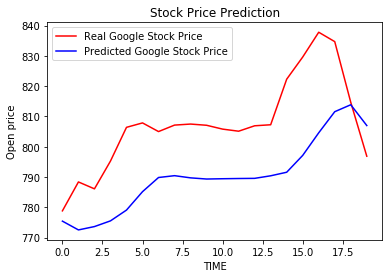

In [51]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predict_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('TIME')
plt.ylabel('Open price')
plt.legend()

plt.show()

In [53]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predict_stock_price))

In [54]:
print(rmse)

20.065634589370298
